In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurant-dataset/HyderabadResturants.csv


In [2]:
df = pd.read_csv('/kaggle/input/zomato-restaurant-dataset/HyderabadResturants.csv') 

In [3]:
df.head()

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [4]:
df.shape

(657, 5)

In [5]:
df[0:5]

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers...,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari...,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biry...,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-b...,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rol...",100


In [6]:
len(df[df['cuisine'].str.contains("Pizza")])


65

In [7]:
len(df[df['cuisine'].str.contains("Chinese")])

131

In [8]:
unique_variety = dict()
for unique_variety_per_restuarant in df['cuisine']:
    for unique in unique_variety_per_restuarant.split(", "):
            if unique in unique_variety.keys():
                unique_variety.update([(unique, unique_variety[unique]+1)])
            else: 
                unique_variety[unique] = 1      
    

In [9]:
# print(unique_variety)
keys = unique_variety.keys()
values = unique_variety.values()
print("keys : ", str(keys))
print("values : ", str(values))

keys :  dict_keys(['Chinese', 'Bakery', 'Sichuan', 'Pizza', 'Burger', 'Fast Food', 'Biryani', 'Desserts', 'Beverages', 'South Indian', 'Andhra', 'Mithai', 'Kebab', 'Sandwich', 'Wraps', 'Rolls', 'Salad', 'North Indian', 'Mughlai', 'Mandi', 'Shawarma', 'Seafood', 'Ice Cream', 'Hyderabadi', 'Pasta', 'Healthy Food', 'Shake', 'Pancake', 'Street Food', 'Tea', 'Coffee', 'Momos', 'Cafe', 'Waffle', 'Mexican', 'Kerala', 'Asian', 'Juices', 'Continental', 'American', 'Lebanese', 'Bengali', 'Arabian', 'BBQ', 'Singaporean', 'Thai', 'Maharashtrian', 'Italian', 'Awadhi', 'Modern Indian', 'Roast Chicken', 'Lucknowi', 'Rajasthani', 'Paan', 'Bubble Tea', 'Frozen Yogurt', 'European', 'Oriental', 'Middle Eastern'])
values :  dict_values([131, 80, 36, 65, 46, 159, 73, 189, 182, 153, 24, 58, 17, 29, 9, 8, 13, 153, 31, 6, 15, 12, 59, 20, 8, 28, 67, 6, 76, 31, 22, 15, 35, 16, 9, 1, 7, 24, 20, 4, 8, 1, 4, 3, 1, 1, 3, 20, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1])


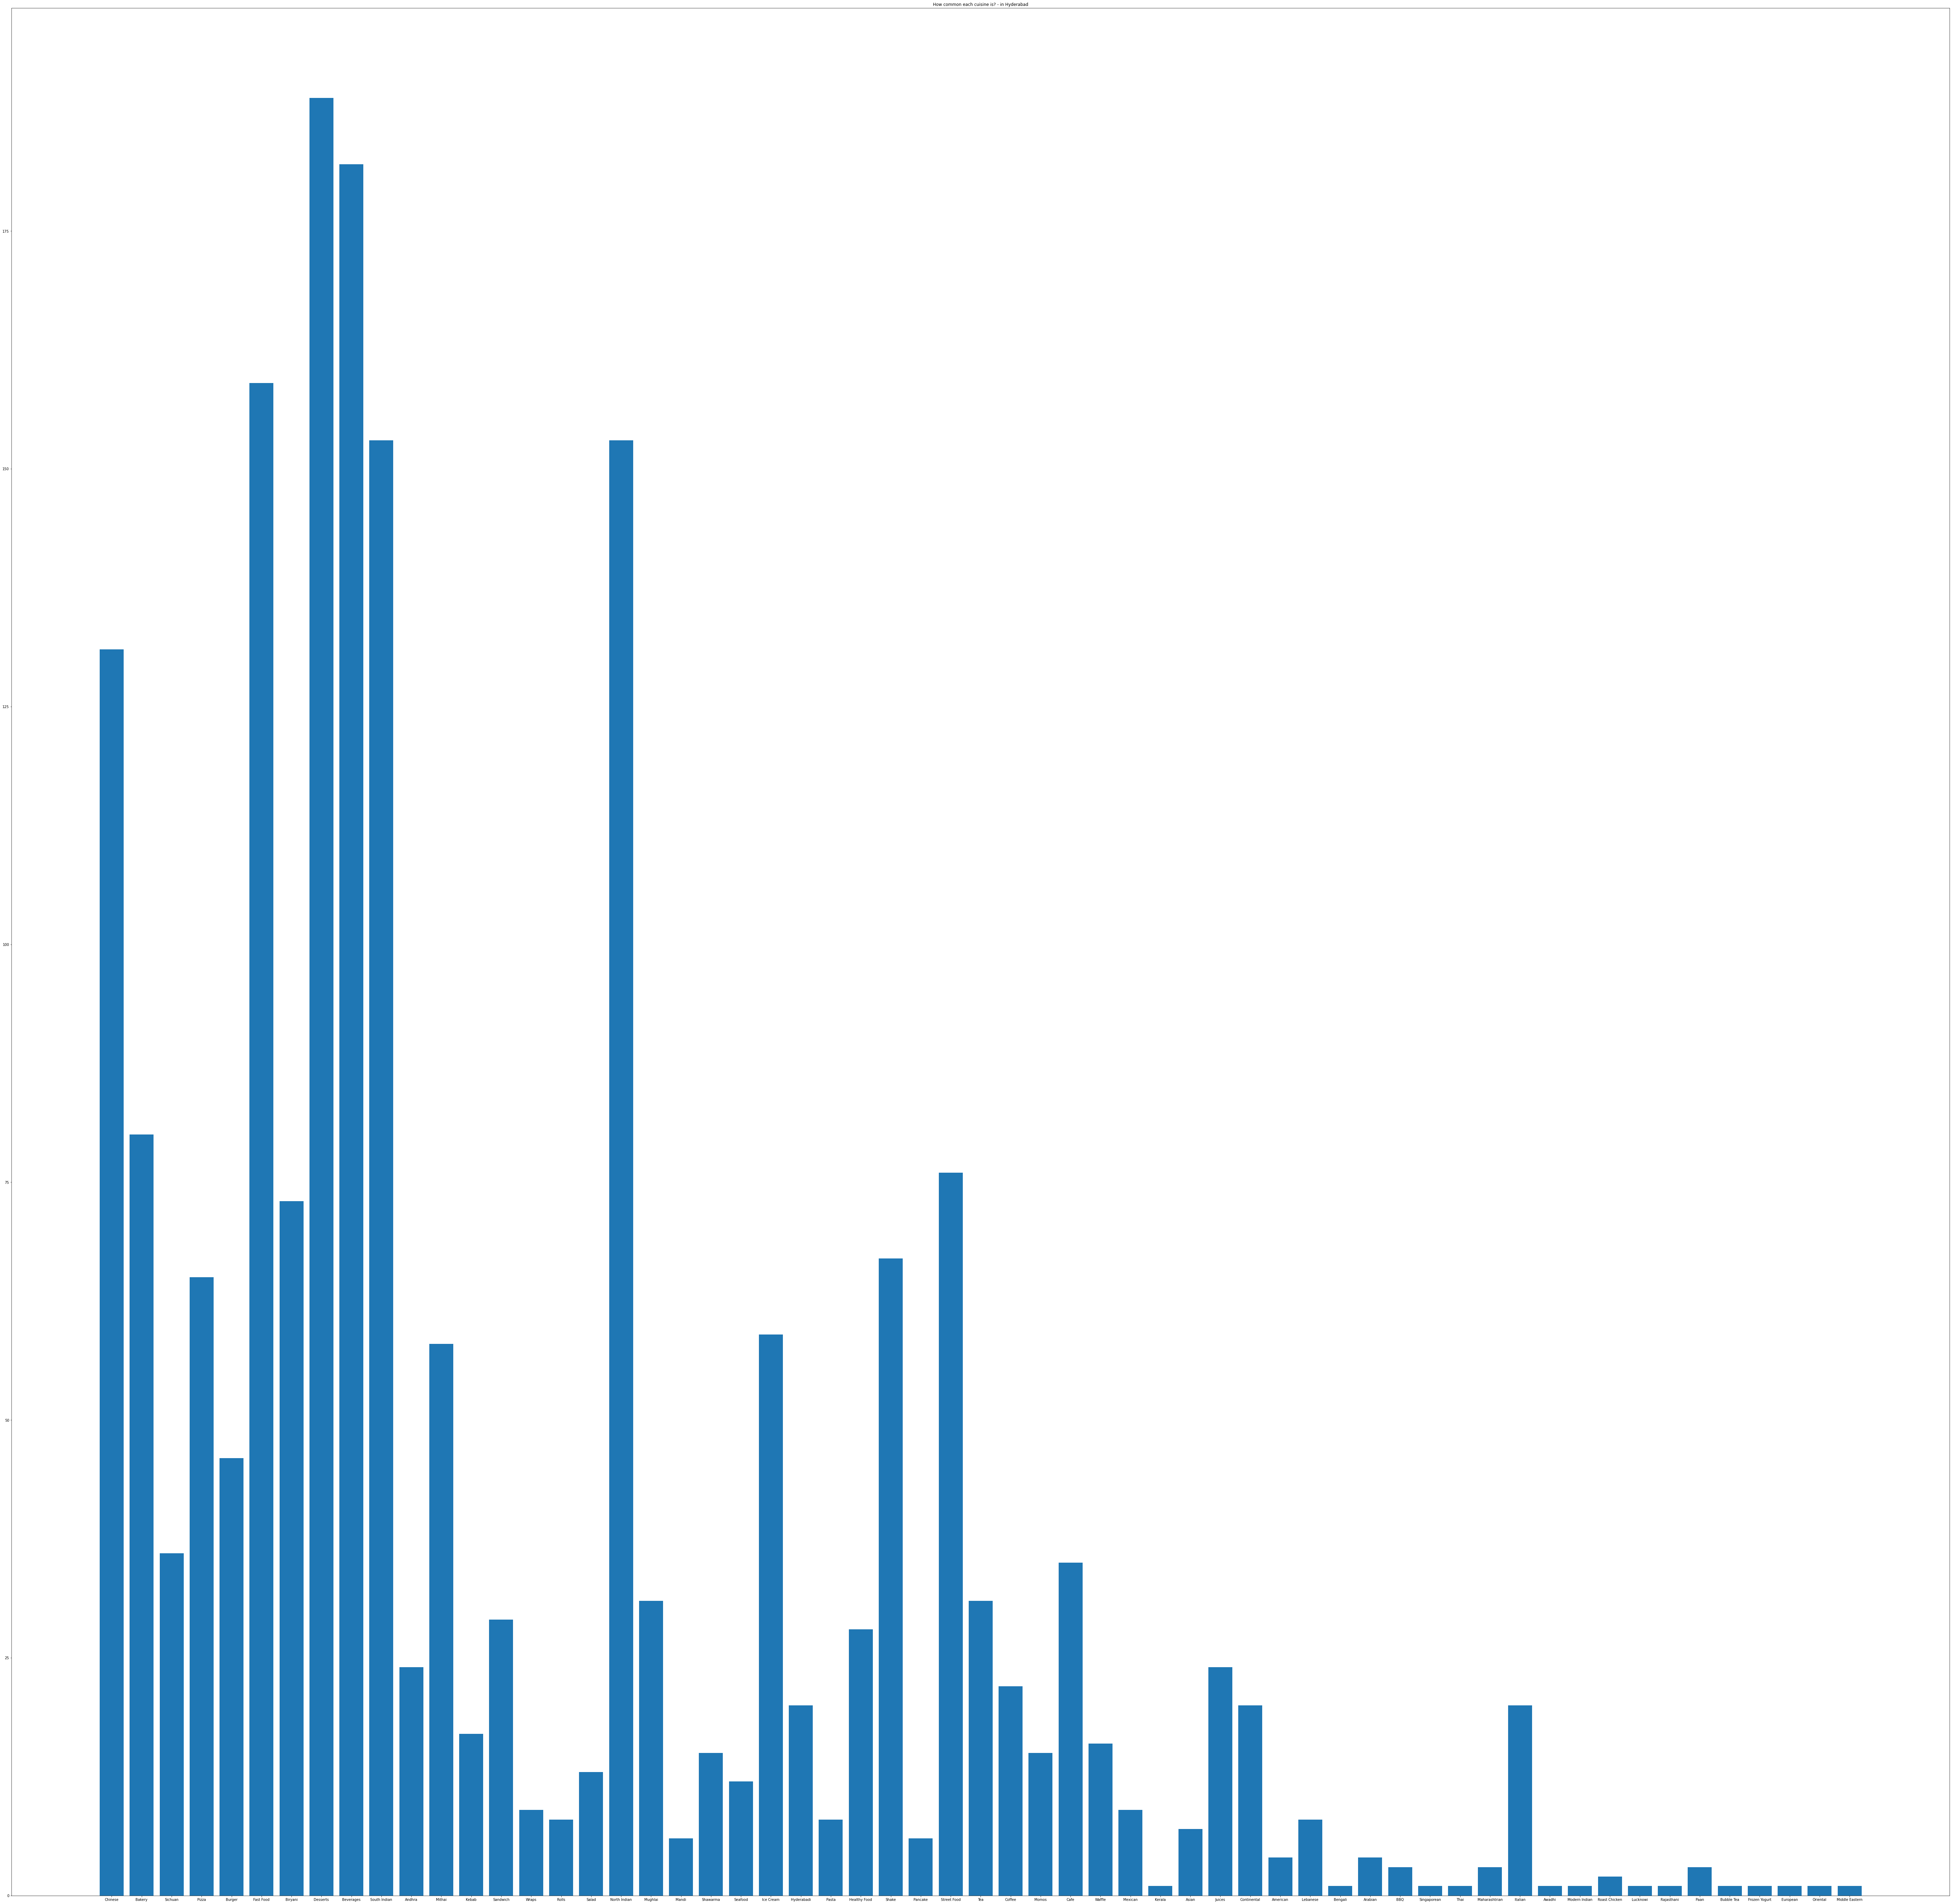

In [10]:
plt.figure(figsize=(100,100))

plt.title("How common each cuisine is? - in Hyderabad")
plt.bar(keys,values)
plt.show()

In [11]:
df.ratings.unique()

array(['3.7', '3.9', '4.1', '4.3', '4', '4.2', '4.4', '4.5', '3.8', '4.6',
       '3.6', 'New', '3.4', '3.5', '3.1', '3.3', '2.7', '3.2', '-', '3',
       '4.7', '2.8', '2.9', '2.6'], dtype=object)

In [12]:
df['ratings'].mask(df['ratings'] == 0, '0.0', inplace=True)
  

In [13]:
df.ratings.unique()

array(['3.7', '3.9', '4.1', '4.3', '4', '4.2', '4.4', '4.5', '3.8', '4.6',
       '3.6', 'New', '3.4', '3.5', '3.1', '3.3', '2.7', '3.2', '-', '3',
       '4.7', '2.8', '2.9', '2.6'], dtype=object)

In [14]:
df['ratings'].mask(df['ratings'] == '-', '0.0', inplace=True)
  

In [15]:
df.ratings.unique()

array(['3.7', '3.9', '4.1', '4.3', '4', '4.2', '4.4', '4.5', '3.8', '4.6',
       '3.6', 'New', '3.4', '3.5', '3.1', '3.3', '2.7', '3.2', '0.0', '3',
       '4.7', '2.8', '2.9', '2.6'], dtype=object)

In [16]:
df["ratings"] = df["ratings"].astype(str).astype(float)

ValueError: could not convert string to float: 'New'

In [ ]:
df.ratings.unique()

In [ ]:
rating_dict = dict()
rating_dict = {'0-1': 0,'1-2':0,'2-3':0,'3-4':0,'4-5':0}
def rating_count(rating):
    if rating >= 0.0 and rating < 1.0:
        rating_dict.update([('0-1', rating_dict['0-1']+1)])
    elif rating >= 1.0 and rating < 2.0:
        rating_dict.update([('1-2', rating_dict['1-2']+1)])
    elif rating >= 2.0 and rating < 3.0:
        rating_dict.update([('2-3', rating_dict['2-3']+1)])
    elif rating >= 3.0 and rating < 4.0:
        rating_dict.update([('3-4', rating_dict['3-4']+1)])
    else:
        rating_dict.update([('4-5', rating_dict['4-5']+1)])

In [ ]:
x = df['ratings'].apply(rating_count)


In [ ]:
print(rating_dict)

In [ ]:
keys = rating_dict.keys()
values = rating_dict.values()
print("keys : ", str(keys))
print("values : ", str(values))


plt.bar(keys,values)
plt.show()

In [ ]:
df['price for one'].unique()

In [ ]:
df.columns = df.columns.str.replace('price for one', 'price_for_one')

In [ ]:
df.columns

In [ ]:
df1 = df[(df.ratings >= 4) & (df.price_for_one >= 4.0)].count()

In [ ]:
df1

In [ ]:
sns.lmplot(data=df[df['ratings'] != 0], x='price_for_one',y='ratings')#, shade=True)
plt.title("Does Price (per head) affect ratings?")
plt.show()

In [ ]:
df["TotalCuisines"] = df.iloc[:,6:].sum(axis=1)
df